In [1]:
#Heart Disease Classification Model
#Initializing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 15)

In [8]:
#Drop the column Unnamed as it doesn't contribute
data=data.drop(['Unnamed: 0'],axis=1)

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data['cp']=data['cp'].replace(0,data['cp'].mean())
data['fbs']=data['fbs'].replace(0,data['fbs'].mean())



In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,1.423368,131.623762,246.264026,0.274973,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,0.642960,17.538143,51.830751,0.303297,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.966997,94.000000,126.000000,0.148515,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.966997,120.000000,211.000000,0.148515,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.148515,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.148515,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.shape


(303, 14)

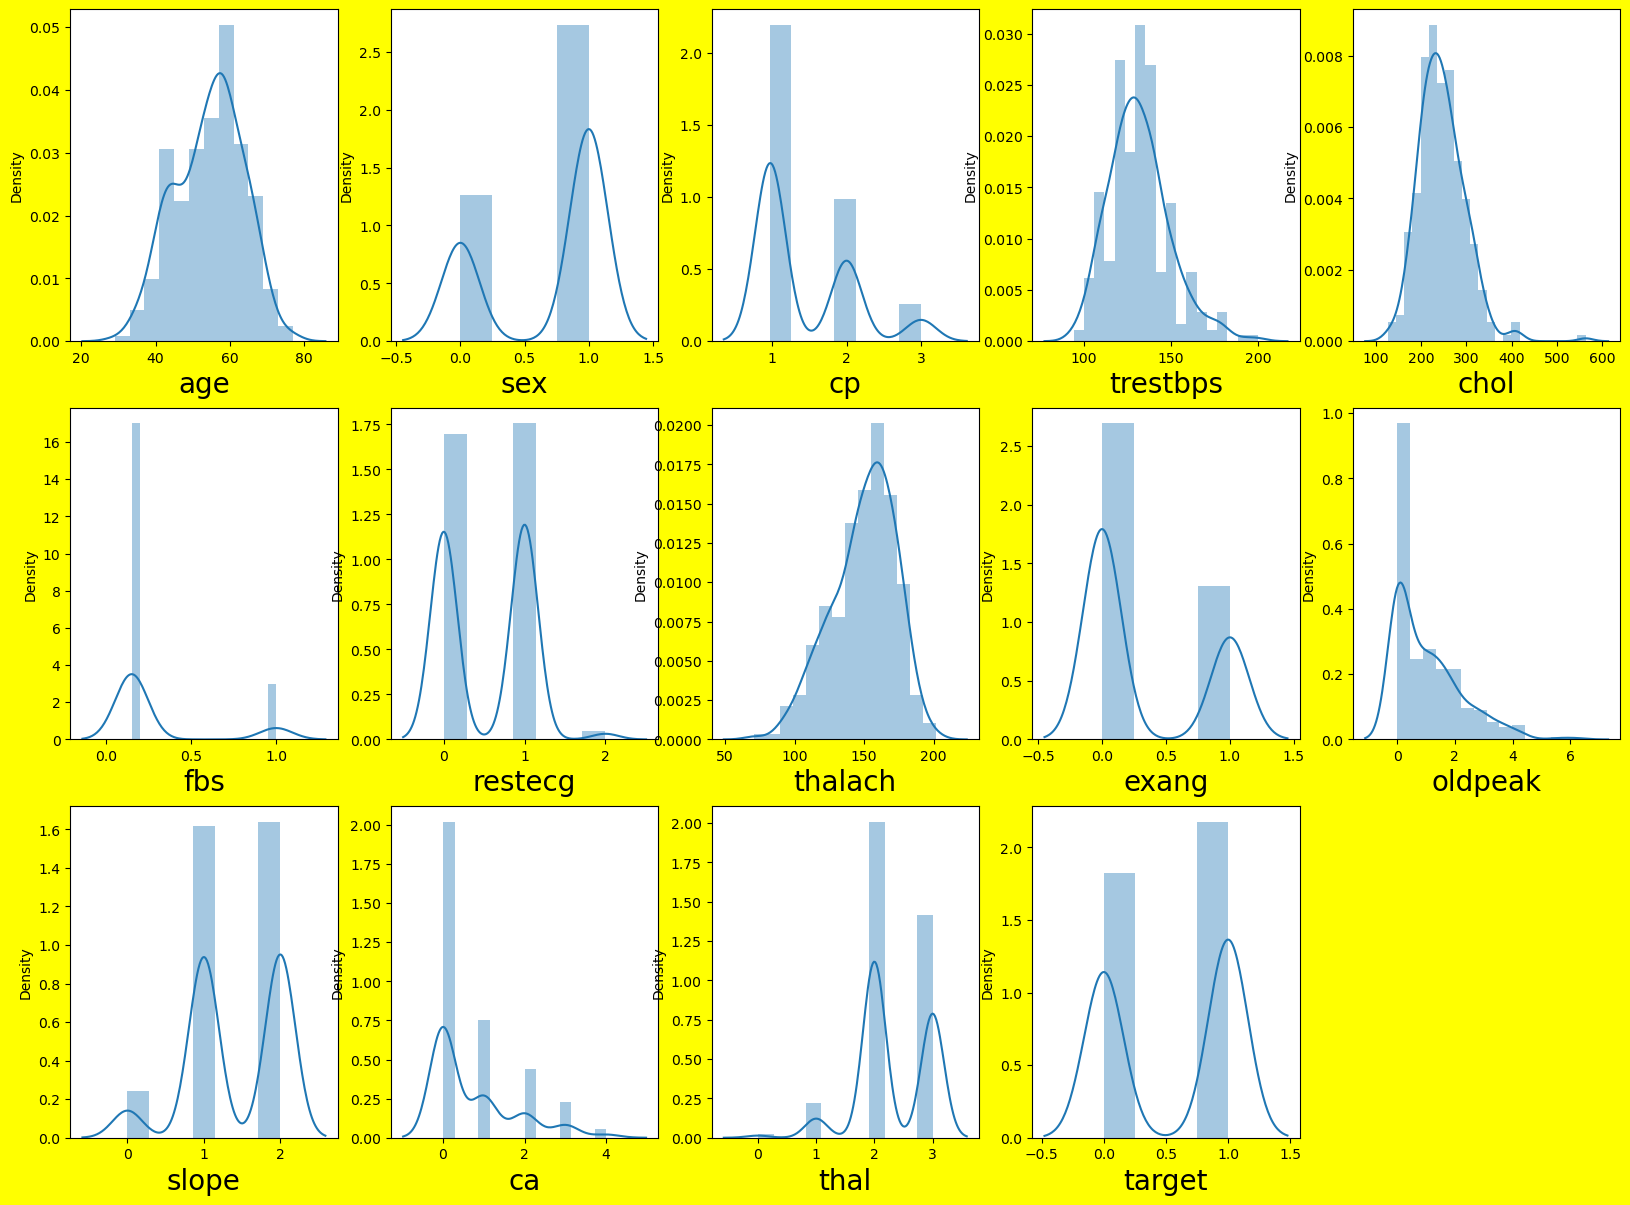

In [18]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in data:
    if plotnumber <=14:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

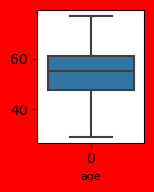

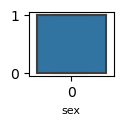

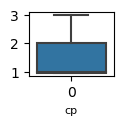

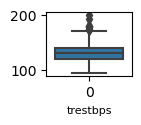

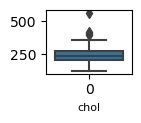

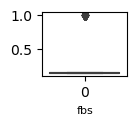

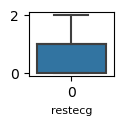

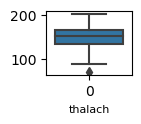

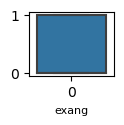

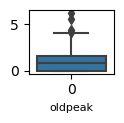

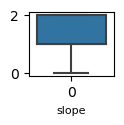

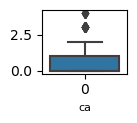

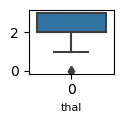

In [22]:
df_features=data.drop('target',axis=1)
plt.figure(figsize=(8,10),facecolor='red')
graph =1
for column in df_features:
    if graph<=14:
        plt.subplot(5,5,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=8)
        graph+=1
        
    plt.show()
        

In [23]:
#Since we have skewness and outliers present, lets work on it
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
q1
higher_outliers=q3+(1.5*IQR)
lower_outliers=q1-(1.5*IQR)

In [24]:
q1

age          47.500000
sex           0.000000
cp            0.966997
trestbps    120.000000
chol        211.000000
fbs           0.148515
restecg       0.000000
thalach     133.500000
exang         0.000000
oldpeak       0.000000
slope         1.000000
ca            0.000000
thal          2.000000
target        0.000000
Name: 0.25, dtype: float64

In [25]:
IQR

age         13.500000
sex          1.000000
cp           1.033003
trestbps    20.000000
chol        63.500000
fbs          0.000000
restecg      1.000000
thalach     32.500000
exang        1.000000
oldpeak      1.600000
slope        1.000000
ca           1.000000
thal         1.000000
target       1.000000
dtype: float64

In [26]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,1.423368,131.623762,246.264026,0.274973,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,0.642960,17.538143,51.830751,0.303297,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.966997,94.000000,126.000000,0.148515,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.966997,120.000000,211.000000,0.148515,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.148515,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.148515,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
trestbps_high=q3.trestbps+(1.5*IQR.trestbps)
trestbps_high

170.0

In [28]:
np_index=np.where(data['trestbps']>trestbps_high)
np_index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266]),)

In [29]:
data=data.drop(data.index[np_index])
data.shape
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3.000000,145,233,1.000000,0,150,0,2.3,0,0,1,1
1,1,37,1,2.000000,130,250,0.148515,1,187,0,3.5,0,0,2,1
2,2,41,0,1.000000,130,204,0.148515,0,172,0,1.4,2,0,2,1
3,3,56,1,1.000000,120,236,0.148515,1,178,0,0.8,2,0,2,1
4,4,57,0,0.966997,120,354,0.148515,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0.966997,140,241,0.148515,1,123,1,0.2,1,0,3,0
290,299,45,1,3.000000,110,264,0.148515,1,132,0,1.2,1,0,3,0
291,300,68,1,0.966997,144,193,1.000000,1,141,0,3.4,1,2,3,0
292,301,57,1,0.966997,130,131,0.148515,1,115,1,1.2,1,1,3,0


In [30]:
chol_high=q3.chol+(1.5*IQR.chol)
chol_high

369.75

In [31]:
chol_index=np.where(data['chol']>chol_high)
chol_index

(array([ 27,  84,  95, 216, 240]),)

In [32]:
data=data.drop(data.index[chol_index])
data.shape
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3.000000,145,233,1.000000,0,150,0,2.3,0,0,1,1
1,1,37,1,2.000000,130,250,0.148515,1,187,0,3.5,0,0,2,1
2,2,41,0,1.000000,130,204,0.148515,0,172,0,1.4,2,0,2,1
3,3,56,1,1.000000,120,236,0.148515,1,178,0,0.8,2,0,2,1
4,4,57,0,0.966997,120,354,0.148515,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0.966997,140,241,0.148515,1,123,1,0.2,1,0,3,0
285,299,45,1,3.000000,110,264,0.148515,1,132,0,1.2,1,0,3,0
286,300,68,1,0.966997,144,193,1.000000,1,141,0,3.4,1,2,3,0
287,301,57,1,0.966997,130,131,0.148515,1,115,1,1.2,1,1,3,0


In [33]:
thalach_low=q1.thalach-(1.5*IQR.thalach)
thalach_low

84.75

In [35]:
thalach_index=np.where(data['thalach']<thalach_low)
thalach_index

(array([258]),)

In [36]:
data=data.drop(data.index[thalach_index])
data.shape
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3.000000,145,233,1.000000,0,150,0,2.3,0,0,1,1
1,1,37,1,2.000000,130,250,0.148515,1,187,0,3.5,0,0,2,1
2,2,41,0,1.000000,130,204,0.148515,0,172,0,1.4,2,0,2,1
3,3,56,1,1.000000,120,236,0.148515,1,178,0,0.8,2,0,2,1
4,4,57,0,0.966997,120,354,0.148515,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,298,57,0,0.966997,140,241,0.148515,1,123,1,0.2,1,0,3,0
284,299,45,1,3.000000,110,264,0.148515,1,132,0,1.2,1,0,3,0
285,300,68,1,0.966997,144,193,1.000000,1,141,0,3.4,1,2,3,0
286,301,57,1,0.966997,130,131,0.148515,1,115,1,1.2,1,1,3,0


In [37]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.027778,0.701389,1.425617,130.031250,242.177083,0.266777,0.531250,149.756944,0.319444,1.006250,1.413194,0.729167,2.298611,0.552083
std,9.114788,0.458446,0.643853,15.414903,45.048792,0.294982,0.520382,22.719850,0.467073,1.133477,0.612955,1.023887,0.614345,0.498146
min,29.000000,0.000000,0.966997,94.000000,126.000000,0.148515,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.966997,120.000000,209.750000,0.148515,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.148515,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.148515,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
oldpeak_high=q3.oldpeak+(1.5*IQR.oldpeak)
oldpeak_high

4.0

In [39]:
oldpeak_index=np.where(data['oldpeak']>oldpeak_high)
oldpeak_index

(array([197, 213, 238, 276]),)

In [40]:
data=data.drop(data.index[oldpeak_index])
data.shape
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3.000000,145,233,1.000000,0,150,0,2.3,0,0,1,1
1,1,37,1,2.000000,130,250,0.148515,1,187,0,3.5,0,0,2,1
2,2,41,0,1.000000,130,204,0.148515,0,172,0,1.4,2,0,2,1
3,3,56,1,1.000000,120,236,0.148515,1,178,0,0.8,2,0,2,1
4,4,57,0,0.966997,120,354,0.148515,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,298,57,0,0.966997,140,241,0.148515,1,123,1,0.2,1,0,3,0
284,299,45,1,3.000000,110,264,0.148515,1,132,0,1.2,1,0,3,0
285,300,68,1,0.966997,144,193,1.000000,1,141,0,3.4,1,2,3,0
286,301,57,1,0.966997,130,131,0.148515,1,115,1,1.2,1,1,3,0


In [42]:
ca_high=q3.ca+(1.5*IQR.ca)
ca_high
ca_index=np.where(data['ca']>ca_high)
ca_index
data=data.drop(data.index[oldpeak_index])
data.shape
data.reset_index()



,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3.000000,145,233,1.000000,0,150,0,2.3,0,0,1,1
1,1,37,1,2.000000,130,250,0.148515,1,187,0,3.5,0,0,2,1
2,2,41,0,1.000000,130,204,0.148515,0,172,0,1.4,2,0,2,1
3,3,56,1,1.000000,120,236,0.148515,1,178,0,0.8,2,0,2,1
4,4,57,0,0.966997,120,354,0.148515,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,298,57,0,0.966997,140,241,0.148515,1,123,1,0.2,1,0,3,0
280,299,45,1,3.000000,110,264,0.148515,1,132,0,1.2,1,0,3,0
281,300,68,1,0.966997,144,193,1.000000,1,141,0,3.4,1,2,3,0
282,301,57,1,0.966997,130,131,0.148515,1,115,1,1.2,1,1,3,0


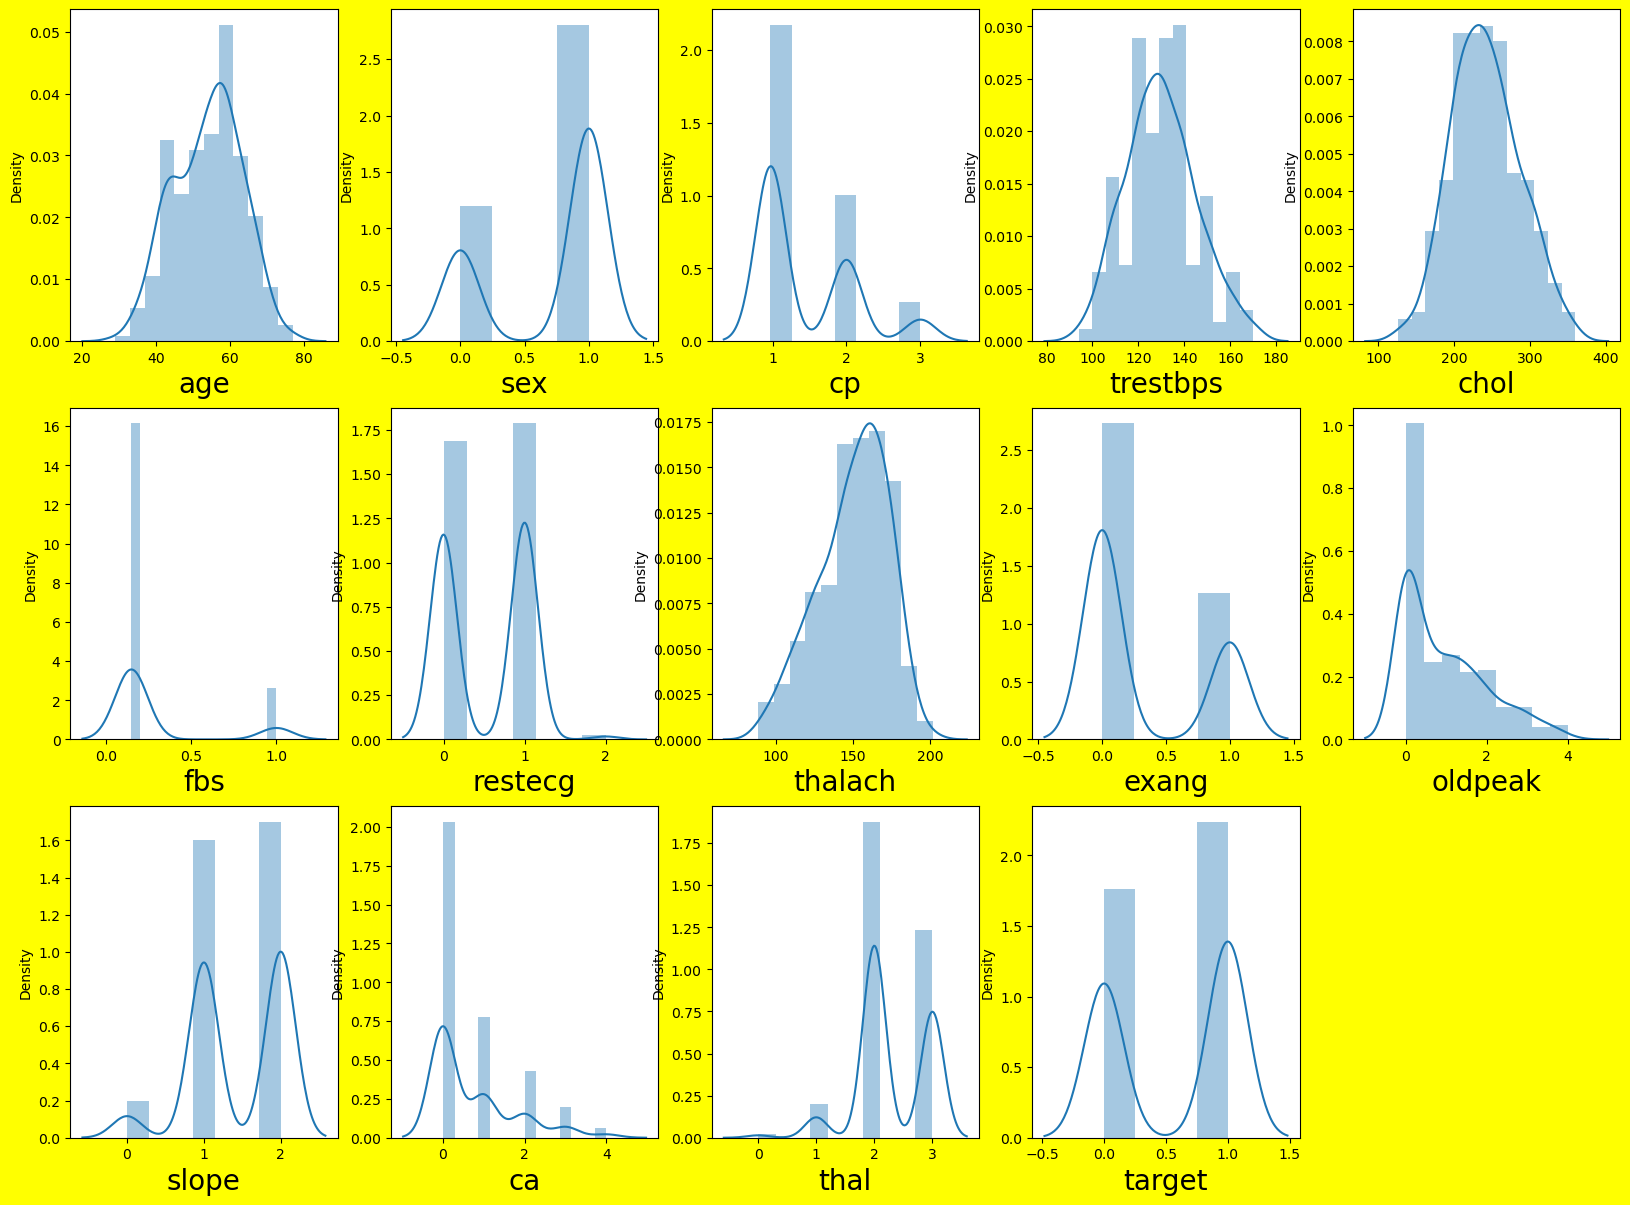

In [43]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in data:
    if plotnumber <=14:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

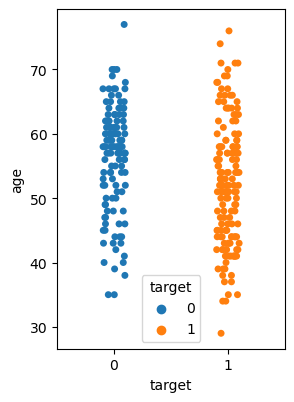

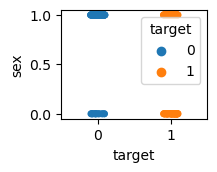

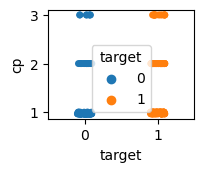

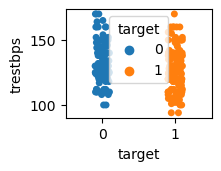

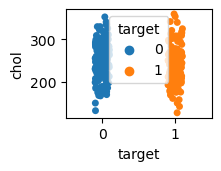

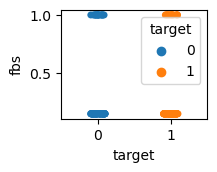

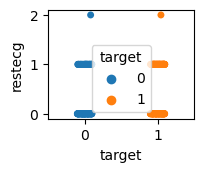

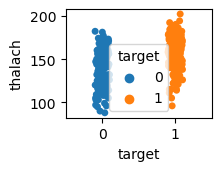

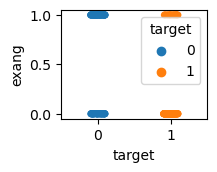

ValueError: num must be an integer with 1 <= num <= 9, not 10

<Figure size 640x480 with 0 Axes>

In [49]:
#Relationship features which determine the heart disease factor (label)are age, thalach, oldpeak, treastbps, chol,fbs,restecg,oldpeak
X=data.drop(columns=['target'])
y=data['target']
plt.figure(figsize=(10,15))

plotnumber=1
for column in X:
    if plotnumber<=14:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column],hue=y)
        plotnumber+=1
        
    plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_scaled.shape[1]

13

In [51]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

In [52]:
vif

,vif,Features
0,1.440497,age
1,1.173460,sex
2,1.155290,cp
3,1.145390,trestbps
4,1.116712,chol
5,1.070792,fbs
6,1.078376,restecg
7,1.610532,thalach
8,1.378963,exang
9,1.576728,oldpeak


In [53]:
#All the variance inflation factor is leass than 5 so there is not multicollinearity. We can go ahead with fitting the data to the model
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=300)

In [54]:
#Classification Model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1])

In [58]:
log_reg.predict_proba(x_test)

array([[0.03138602, 0.96861398],
       [0.96605251, 0.03394749],
       [0.69651969, 0.30348031],
       [0.38245119, 0.61754881],
       [0.94420069, 0.05579931],
       [0.40414821, 0.59585179],
       [0.30086927, 0.69913073],
       [0.29262717, 0.70737283],
       [0.93137686, 0.06862314],
       [0.20506735, 0.79493265],
       [0.88286733, 0.11713267],
       [0.07264363, 0.92735637],
       [0.45458189, 0.54541811],
       [0.01615321, 0.98384679],
       [0.44722611, 0.55277389],
       [0.02670964, 0.97329036],
       [0.22672982, 0.77327018],
       [0.57971747, 0.42028253],
       [0.99325767, 0.00674233],
       [0.15241148, 0.84758852],
       [0.45647644, 0.54352356],
       [0.95944651, 0.04055349],
       [0.48910202, 0.51089798],
       [0.97936822, 0.02063178],
       [0.27568255, 0.72431745],
       [0.57451691, 0.42548309],
       [0.4356166 , 0.5643834 ],
       [0.96239777, 0.03760223],
       [0.19645058, 0.80354942],
       [0.02996866, 0.97003134],
       [0.

In [59]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[23,  8],
       [ 3, 37]])

In [60]:
#Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8450704225352113

In [61]:
print('\n\n Classification Report\n',classification_report(y_test,y_pred))



 Classification Report
               precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.82      0.93      0.87        40

    accuracy                           0.85        71
   macro avg       0.85      0.83      0.84        71
weighted avg       0.85      0.85      0.84        71



In [62]:
#ROC Curve 
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=  ',thresholds)
print('True Positive Rate=  ',tpr)
print('False Positive Rate=  ',fpr)


Threshold=   [inf  1.  0.]
True Positive Rate=   [0.    0.925 1.   ]
False Positive Rate=   [0.         0.25806452 1.        ]


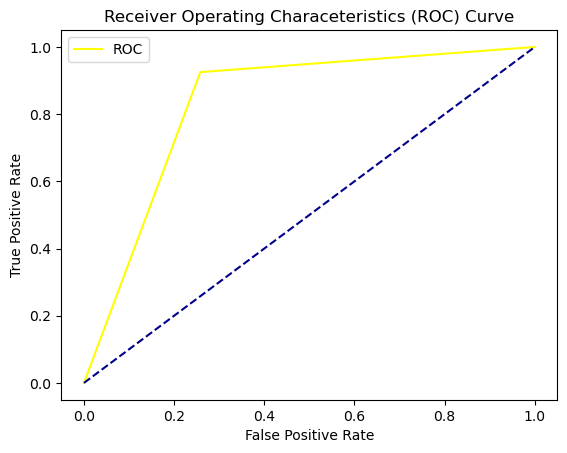

In [63]:
plt.plot(fpr,tpr,color='yellow',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characeteristics (ROC) Curve')
plt.legend()
plt.show()

In [64]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.8334677419354839


In [ ]:
#Our model is 84% accurate.
#Most of the features are necessary to determine the heart disease. 
